In [41]:
import pandas as pd

df = pd.read_csv(r'C:\Users\clint\Desktop\Research-Paper-Trucks\Exploration\5\df_4.csv')
df

,REPORT_DATE,FATALITIES,STATE,COUNTY,change_2007,change_2008,change_2015,change_2016,change_2006_2016,indicator_2002_2006,indicator_1999_2001,indicator_1993_1998,has_accident_before_2006,name,Longitude,Latitude,Region,Family,Color,Nearest Neighbor
0,2024-09-17,1,MD,24009,0.0,0.0,0.0,0.0,0.0,0,0,0,0,Calvert,-76.568824,38.543774,NaN,NaN,NaN,NaN
1,2024-09-17,1,MD,24009,0.0,0.0,0.0,0.0,0.0,0,0,0,0,Calvert,-76.568824,38.543774,NaN,NaN,NaN,NaN
2,2024-09-17,1,MD,24009,0.0,0.0,0.0,0.0,0.0,0,0,0,0,Calvert,-76.568824,38.543774,NaN,NaN,NaN,NaN
3,2024-11-27,1,NC,37195,0.0,0.0,0.0,0.0,0.0,0,0,0,0,Wilson,-77.918912,35.705312,NaN,NaN,NaN,NaN
4,2024-11-22,1,NV,32003,0.0,-2.0,0.0,0.0,-3.0,0,0,0,0,Clark,-115.014609,36.215115,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1654,1995-08-27,2,TN,47065,2.0,0.0,0.0,0.0,1.0,0,0,1,1,Hamilton,-85.164448,35.181335,NaN,NaN,NaN,NaN
1655,1999-10-23,3,TN,47089,0.0,0.0,0.0,0.0,-1.0,0,1,0,1,Jefferson,-83.446525,36.051341,NaN,NaN,NaN,NaN
1656,2000-08-06,2,TN,47055,0.0,0.0,0.0,-1.0,-1.0,0,1,0,1,Giles,-87.035418,35.201943,NaN,NaN,NaN,NaN
1657,1999-06-14,2,TN,47145,1.0,-1.0,0.0,0.0,0.0,0,1,0,1,Roane,-84.523355,35.847630,NaN,NaN,NaN,NaN


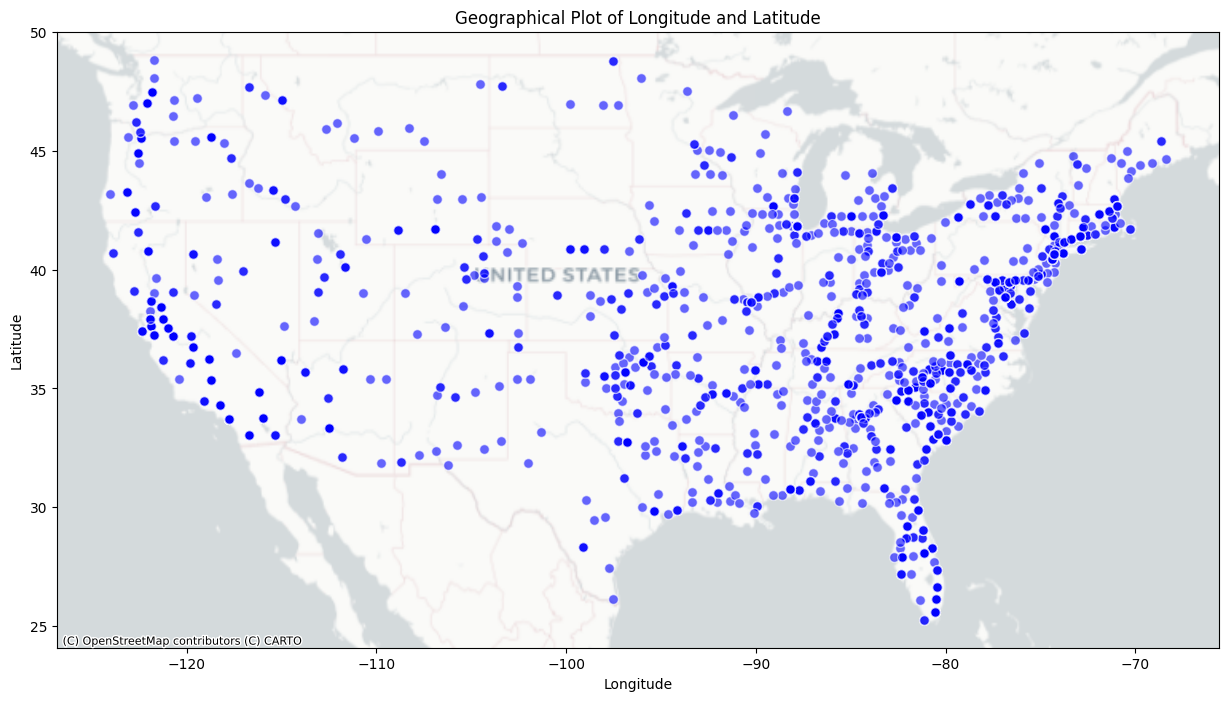

In [42]:
# Use the inline backend for Jupyter Notebooks
%matplotlib inline

import geopandas as gpd
import matplotlib.pyplot as plt
import contextily as ctx
import pandas as pd

def plot_geodata(df):
    # Convert the DataFrame to a GeoDataFrame
    gdf = gpd.GeoDataFrame(df, geometry=gpd.points_from_xy(df.Longitude, df.Latitude))

    # Set the CRS to WGS84 (EPSG:4326)
    gdf.set_crs(epsg=4326, inplace=True)

    # Plot the data
    fig, ax = plt.subplots(1, 1, figsize=(15, 15))

    # Plot points with circle markers
    gdf.plot(ax=ax, color='blue', markersize=50, alpha=0.6, edgecolor='w')

    # Add a basemap
    ctx.add_basemap(ax, crs=gdf.crs.to_string(), source=ctx.providers.CartoDB.Positron)

    # Add labels and title
    plt.xlabel('Longitude')
    plt.ylabel('Latitude')
    plt.title('Geographical Plot of Longitude and Latitude')

    # Show the plot
    plt.show()



# Plot the data
plot_geodata(df)

In [43]:
df_new = pd.read_csv(r'C:\Users\clint\Desktop\Research-Paper-Trucks\Exploration\5\df_4_2.csv')
df_new

,Metropolitan Area or Part,Region,Family,Latitude,Longitude,Color,Nearest Neighbor
0,Atlanta,S,Middle America,33.750127,-84.388521,orange,NaN
1,Austin,S,Austin,30.267153,-97.743061,red,NaN
2,Boston (MA),NE,Exclusion with Restriction,42.355508,-71.056536,blue,NaN
3,Boston (NH),NE,Extreme Exclusion,42.976194,-71.693963,blue,NaN
4,Buffalo,NE,Middle America,42.886447,-78.878369,orange,NaN
...,...,...,...,...,...,...,...
68,Washington (DC),S,Containment-Lite,38.907192,-77.036871,green,Washington (MD)
69,Washington (MD),S,Containment-Lite,39.613048,-77.699420,green,NaN
70,Washington (VA),S,Middle America,38.713430,-78.159081,orange,NaN
71,Washington (WV),S,Middle America,39.244853,-81.663776,orange,Columbus


In [44]:
import pandas as pd
from sklearn.neighbors import NearestNeighbors



# Fit the NearestNeighbors model
neigh = NearestNeighbors(n_neighbors=1)
neigh.fit(df_new[['Longitude', 'Latitude']])

# Find the nearest neighbors
distances, indices = neigh.kneighbors(df[['Longitude', 'Latitude']])

# Add the nearest neighbor information to df
df['Nearest Neighbor'] = df_new.iloc[indices.flatten()]['Metropolitan Area or Part'].values
df['Region'] = df_new.iloc[indices.flatten()]['Region'].values
df['Family'] = df_new.iloc[indices.flatten()]['Family'].values
df['Color'] = df_new.iloc[indices.flatten()]['Color'].values

df

,REPORT_DATE,FATALITIES,STATE,COUNTY,change_2007,change_2008,change_2015,change_2016,change_2006_2016,indicator_2002_2006,indicator_1999_2001,indicator_1993_1998,has_accident_before_2006,name,Longitude,Latitude,Region,Family,Color,Nearest Neighbor
0,2024-09-17,1,MD,24009,0.0,0.0,0.0,0.0,0.0,0,0,0,0,Calvert,-76.568824,38.543774,S,Containment-Lite,green,Philadelphia (MD)
1,2024-09-17,1,MD,24009,0.0,0.0,0.0,0.0,0.0,0,0,0,0,Calvert,-76.568824,38.543774,S,Containment-Lite,green,Philadelphia (MD)
2,2024-09-17,1,MD,24009,0.0,0.0,0.0,0.0,0.0,0,0,0,0,Calvert,-76.568824,38.543774,S,Containment-Lite,green,Philadelphia (MD)
3,2024-11-27,1,NC,37195,0.0,0.0,0.0,0.0,0.0,0,0,0,0,Wilson,-77.918912,35.705312,S,Middle America,orange,Raleigh
4,2024-11-22,1,NV,32003,0.0,-2.0,0.0,0.0,-3.0,0,0,0,0,Clark,-115.014609,36.215115,W,Containment,green,Las Vegas (AZ)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1654,1995-08-27,2,TN,47065,2.0,0.0,0.0,0.0,1.0,0,0,1,1,Hamilton,-85.164448,35.181335,S,Middle America,orange,Atlanta
1655,1999-10-23,3,TN,47089,0.0,0.0,0.0,0.0,-1.0,0,1,0,1,Jefferson,-83.446525,36.051341,S,Middle America,orange,Atlanta
1656,2000-08-06,2,TN,47055,0.0,0.0,0.0,-1.0,-1.0,0,1,0,1,Giles,-87.035418,35.201943,S,Containment,green,Nashville
1657,1999-06-14,2,TN,47145,1.0,-1.0,0.0,0.0,0.0,0,1,0,1,Roane,-84.523355,35.847630,S,Middle America,orange,Atlanta


In [45]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors



# Get unique regions
unique_regions = df['Region'].unique()

# Generate a list of colors
colors = plt.cm.get_cmap('tab20', len(unique_regions)).colors

# Create a dictionary to map regions to colors
region_colors = {region: mcolors.rgb2hex(color) for region, color in zip(unique_regions, colors)}

# Create the Region_color column by mapping the Region column
df['Region_color'] = df['Region'].map(region_colors)

df

C:\Users\clint\AppData\Local\Temp\ipykernel_14560\3461209924.py:11: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  colors = plt.cm.get_cmap('tab20', len(unique_regions)).colors


,REPORT_DATE,FATALITIES,STATE,COUNTY,change_2007,change_2008,change_2015,change_2016,change_2006_2016,indicator_2002_2006,...,indicator_1993_1998,has_accident_before_2006,name,Longitude,Latitude,Region,Family,Color,Nearest Neighbor,Region_color
0,2024-09-17,1,MD,24009,0.0,0.0,0.0,0.0,0.0,0,...,0,0,Calvert,-76.568824,38.543774,S,Containment-Lite,green,Philadelphia (MD),#1f77b4
1,2024-09-17,1,MD,24009,0.0,0.0,0.0,0.0,0.0,0,...,0,0,Calvert,-76.568824,38.543774,S,Containment-Lite,green,Philadelphia (MD),#1f77b4
2,2024-09-17,1,MD,24009,0.0,0.0,0.0,0.0,0.0,0,...,0,0,Calvert,-76.568824,38.543774,S,Containment-Lite,green,Philadelphia (MD),#1f77b4
3,2024-11-27,1,NC,37195,0.0,0.0,0.0,0.0,0.0,0,...,0,0,Wilson,-77.918912,35.705312,S,Middle America,orange,Raleigh,#1f77b4
4,2024-11-22,1,NV,32003,0.0,-2.0,0.0,0.0,-3.0,0,...,0,0,Clark,-115.014609,36.215115,W,Containment,green,Las Vegas (AZ),#d62728
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1654,1995-08-27,2,TN,47065,2.0,0.0,0.0,0.0,1.0,0,...,1,1,Hamilton,-85.164448,35.181335,S,Middle America,orange,Atlanta,#1f77b4
1655,1999-10-23,3,TN,47089,0.0,0.0,0.0,0.0,-1.0,0,...,0,1,Jefferson,-83.446525,36.051341,S,Middle America,orange,Atlanta,#1f77b4
1656,2000-08-06,2,TN,47055,0.0,0.0,0.0,-1.0,-1.0,0,...,0,1,Giles,-87.035418,35.201943,S,Containment,green,Nashville,#1f77b4
1657,1999-06-14,2,TN,47145,1.0,-1.0,0.0,0.0,0.0,0,...,0,1,Roane,-84.523355,35.847630,S,Middle America,orange,Atlanta,#1f77b4


In [46]:
import pandas as pd

# Define the function
def get_simple_family(family):
    family = family.lower()
    if 'growth' in family or 'containment' in family:
        return 'Reform'
    elif 'middle' in family or 'high' in family:
        return 'Traditional'
    elif 'basic' in family or 'plus' in family or 'extreme' in family or 'restriction' in family:
        return 'Exclusion'
    elif 'antonio' in family or 'houston' in family or 'austin' in family:
        return 'Wild Texas'
    else:
        return 'None'

# Assuming df is your DataFrame and df_Family and df_Area are columns in your DataFrame
df['simple_family'] = df.apply(lambda row: get_simple_family(row['Family']), axis=1)
df

,REPORT_DATE,FATALITIES,STATE,COUNTY,change_2007,change_2008,change_2015,change_2016,change_2006_2016,indicator_2002_2006,...,has_accident_before_2006,name,Longitude,Latitude,Region,Family,Color,Nearest Neighbor,Region_color,simple_family
0,2024-09-17,1,MD,24009,0.0,0.0,0.0,0.0,0.0,0,...,0,Calvert,-76.568824,38.543774,S,Containment-Lite,green,Philadelphia (MD),#1f77b4,Reform
1,2024-09-17,1,MD,24009,0.0,0.0,0.0,0.0,0.0,0,...,0,Calvert,-76.568824,38.543774,S,Containment-Lite,green,Philadelphia (MD),#1f77b4,Reform
2,2024-09-17,1,MD,24009,0.0,0.0,0.0,0.0,0.0,0,...,0,Calvert,-76.568824,38.543774,S,Containment-Lite,green,Philadelphia (MD),#1f77b4,Reform
3,2024-11-27,1,NC,37195,0.0,0.0,0.0,0.0,0.0,0,...,0,Wilson,-77.918912,35.705312,S,Middle America,orange,Raleigh,#1f77b4,Traditional
4,2024-11-22,1,NV,32003,0.0,-2.0,0.0,0.0,-3.0,0,...,0,Clark,-115.014609,36.215115,W,Containment,green,Las Vegas (AZ),#d62728,Reform
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1654,1995-08-27,2,TN,47065,2.0,0.0,0.0,0.0,1.0,0,...,1,Hamilton,-85.164448,35.181335,S,Middle America,orange,Atlanta,#1f77b4,Traditional
1655,1999-10-23,3,TN,47089,0.0,0.0,0.0,0.0,-1.0,0,...,1,Jefferson,-83.446525,36.051341,S,Middle America,orange,Atlanta,#1f77b4,Traditional
1656,2000-08-06,2,TN,47055,0.0,0.0,0.0,-1.0,-1.0,0,...,1,Giles,-87.035418,35.201943,S,Containment,green,Nashville,#1f77b4,Reform
1657,1999-06-14,2,TN,47145,1.0,-1.0,0.0,0.0,0.0,0,...,1,Roane,-84.523355,35.847630,S,Middle America,orange,Atlanta,#1f77b4,Traditional


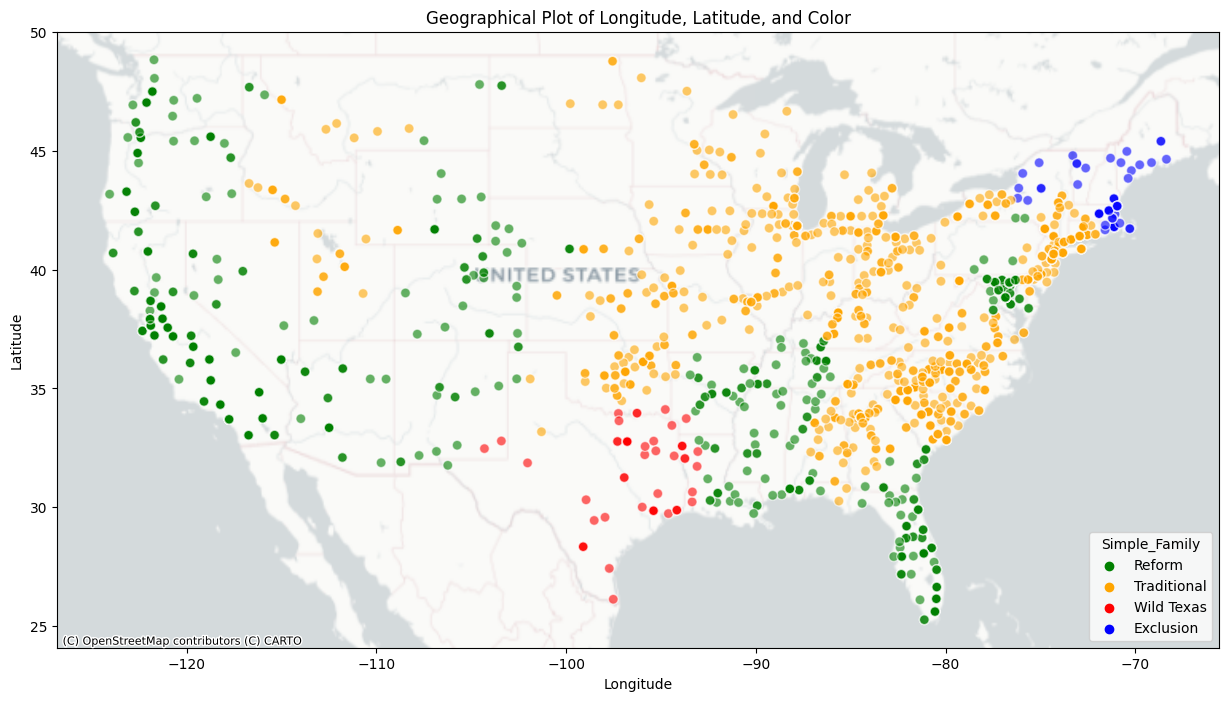

In [47]:
# Use the inline backend for Jupyter Notebooks
%matplotlib inline

import geopandas as gpd
import matplotlib.pyplot as plt
import contextily as ctx
import pandas as pd

def plot_geodata(df):
    # Convert the DataFrame to a GeoDataFrame
    gdf = gpd.GeoDataFrame(df, geometry=gpd.points_from_xy(df.Longitude, df.Latitude))

    # Set the CRS to WGS84 (EPSG:4326)
    gdf.set_crs(epsg=4326, inplace=True)

    # Plot the data
    fig, ax = plt.subplots(1, 1, figsize=(15, 15))

    # Plot points with colors from the Color column
    gdf.plot(ax=ax, color=gdf['Color'], markersize=50, alpha=0.6, edgecolor='w')

    # Add a basemap
    ctx.add_basemap(ax, crs=gdf.crs.to_string(), source=ctx.providers.CartoDB.Positron)

    # Add labels and title
    plt.xlabel('Longitude')
    plt.ylabel('Latitude')
    plt.title('Geographical Plot of Longitude, Latitude, and Color')

    # Create a legend
    unique_families = gdf[['simple_family', 'Color']].drop_duplicates()
    for idx, row in unique_families.iterrows():
        ax.scatter([], [], color=row['Color'], label=row['simple_family'])

    ax.legend(title='Simple_Family')

    # Show the plot
    plt.show()

# Sample DataFrame
# df = pd.DataFrame({
#     'Longitude': [-74.00597, -118.24368, -0.127758],
#     'Latitude': [40.712776, 34.052235, 51.507351],
#     'Color': ['red', 'blue', 'green'],
#     'Family': ['A', 'B', 'C']
# })

# Plot the data
plot_geodata(df)

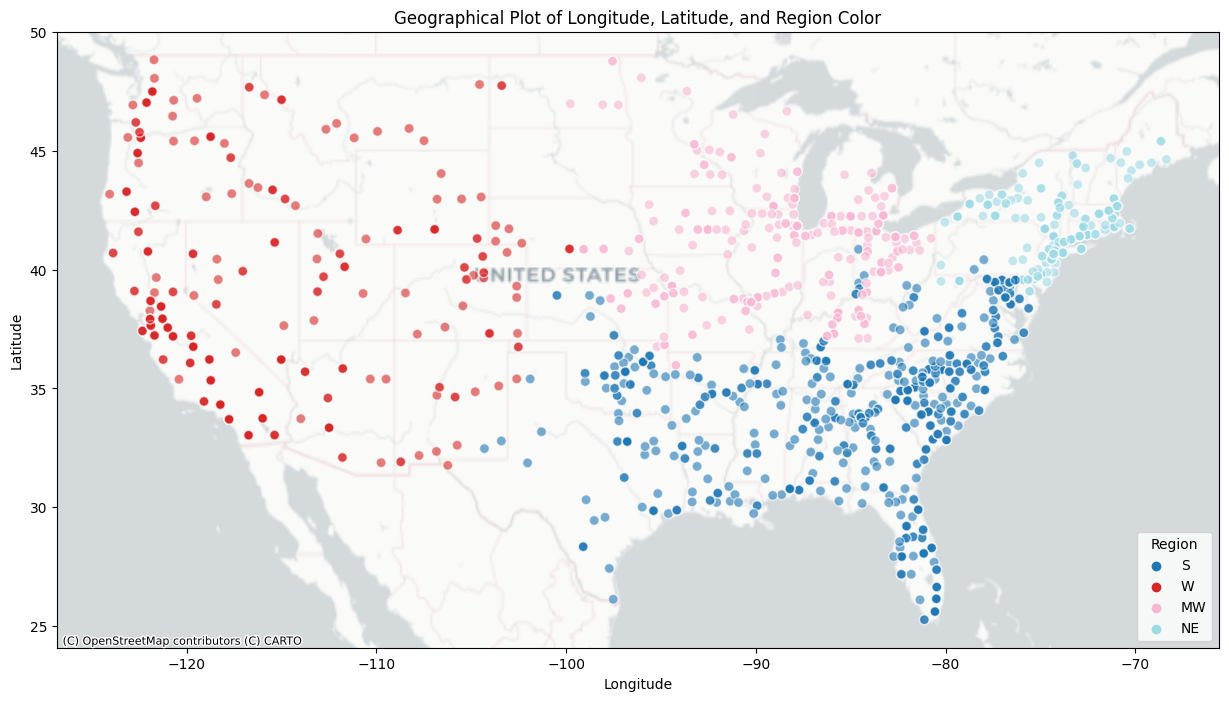

In [48]:
# Use the inline backend for Jupyter Notebooks
%matplotlib inline

import geopandas as gpd
import matplotlib.pyplot as plt
import contextily as ctx
import pandas as pd

def plot_geodata(df):
    # Convert the DataFrame to a GeoDataFrame
    gdf = gpd.GeoDataFrame(df, geometry=gpd.points_from_xy(df.Longitude, df.Latitude))

    # Set the CRS to WGS84 (EPSG:4326)
    gdf.set_crs(epsg=4326, inplace=True)

    # Plot the data
    fig, ax = plt.subplots(1, 1, figsize=(15, 15))

    # Plot points with colors from the Region_color column
    gdf.plot(ax=ax, color=gdf['Region_color'], markersize=50, alpha=0.6, edgecolor='w')

    # Add a basemap
    ctx.add_basemap(ax, crs=gdf.crs.to_string(), source=ctx.providers.CartoDB.Positron)

    # Add labels and title
    plt.xlabel('Longitude')
    plt.ylabel('Latitude')
    plt.title('Geographical Plot of Longitude, Latitude, and Region Color')

    # Create a legend
    unique_regions = gdf[['Region', 'Region_color']].drop_duplicates()
    for idx, row in unique_regions.iterrows():
        ax.scatter([], [], color=row['Region_color'], label=row['Region'])

    ax.legend(title='Region')

    # Show the plot
    plt.show()

# Sample DataFrame
# df = pd.DataFrame({
#     'Longitude': [-74.00597, -118.24368, -0.127758],
#     'Latitude': [40.712776, 34.052235, 51.507351],
#     'Region_color': ['#1f77b4', '#ff7f0e', '#2ca02c'],
#     'Region': ['S', 'W', 'E']
# })

# Plot the data
plot_geodata(df)

In [49]:
df

,REPORT_DATE,FATALITIES,STATE,COUNTY,change_2007,change_2008,change_2015,change_2016,change_2006_2016,indicator_2002_2006,...,has_accident_before_2006,name,Longitude,Latitude,Region,Family,Color,Nearest Neighbor,Region_color,simple_family
0,2024-09-17,1,MD,24009,0.0,0.0,0.0,0.0,0.0,0,...,0,Calvert,-76.568824,38.543774,S,Containment-Lite,green,Philadelphia (MD),#1f77b4,Reform
1,2024-09-17,1,MD,24009,0.0,0.0,0.0,0.0,0.0,0,...,0,Calvert,-76.568824,38.543774,S,Containment-Lite,green,Philadelphia (MD),#1f77b4,Reform
2,2024-09-17,1,MD,24009,0.0,0.0,0.0,0.0,0.0,0,...,0,Calvert,-76.568824,38.543774,S,Containment-Lite,green,Philadelphia (MD),#1f77b4,Reform
3,2024-11-27,1,NC,37195,0.0,0.0,0.0,0.0,0.0,0,...,0,Wilson,-77.918912,35.705312,S,Middle America,orange,Raleigh,#1f77b4,Traditional
4,2024-11-22,1,NV,32003,0.0,-2.0,0.0,0.0,-3.0,0,...,0,Clark,-115.014609,36.215115,W,Containment,green,Las Vegas (AZ),#d62728,Reform
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1654,1995-08-27,2,TN,47065,2.0,0.0,0.0,0.0,1.0,0,...,1,Hamilton,-85.164448,35.181335,S,Middle America,orange,Atlanta,#1f77b4,Traditional
1655,1999-10-23,3,TN,47089,0.0,0.0,0.0,0.0,-1.0,0,...,1,Jefferson,-83.446525,36.051341,S,Middle America,orange,Atlanta,#1f77b4,Traditional
1656,2000-08-06,2,TN,47055,0.0,0.0,0.0,-1.0,-1.0,0,...,1,Giles,-87.035418,35.201943,S,Containment,green,Nashville,#1f77b4,Reform
1657,1999-06-14,2,TN,47145,1.0,-1.0,0.0,0.0,0.0,0,...,1,Roane,-84.523355,35.847630,S,Middle America,orange,Atlanta,#1f77b4,Traditional


In [50]:
df.to_csv('df_5.csv', index=False)